# Linear Regression Implementation from Scratch

In [10]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

## Generating Data Sets

- Randomly generate $\mathbf{X}\in \mathbb{R}^{1000 \times 2}$
- Use ground truth: weight $\mathbf{w} = [2, -3.4]^\top$ and bias $b = 4.2$
- Generate label by $\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$
  with noise $\epsilon$ obeying a normal distribution with a mean of 0 and a standard deviation of 0.01. 

In [11]:
num_inputs = 2
num_examples = 1000
true_w = nd.array([2, -3.4])
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

## Visualize the Second Feature and Label

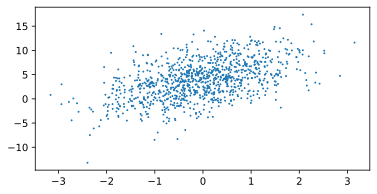

In [12]:
display.set_matplotlib_formats('svg')
plt.figure(figsize=(6, 3))
plt.scatter(features[:, 0].asnumpy(), labels.asnumpy(), 1);

## Reading Data

Iterate over the data set and return `batch_size` (batch size) random examples every time.

In [13]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        # The “take” function will then return the corresponding element based
        # on the indices

## Print a Small Data Batch

In [14]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 1.2599785   0.85971373]
 [-1.3039573   0.7366071 ]
 [ 0.44791192 -1.6668183 ]
 [ 0.36101276 -1.3689542 ]
 [ 0.36810791  0.09975268]
 [ 1.5161693  -1.3435118 ]
 [-1.7542843   1.3018025 ]
 [ 0.15985662  0.80258316]
 [-0.20296443  0.00659762]
 [ 0.6290578   1.2021765 ]]
<NDArray 10x2 @cpu(0)> 
[ 3.7983418 -0.9146275 10.759894   9.57181    4.586103  11.8125725
 -3.7313523  1.7713416  3.7574027  1.3722283]
<NDArray 10 @cpu(0)>


### Initialize Model Parameters

Weights are initialized to normal random numbers using a mean of 0 and a standard deviation of 0.01, with the bias $b$ set to zero.

In [15]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

### Attach Gradients to Parameters

In [16]:
w.attach_grad()
b.attach_grad()

### Define the Linear Model

In [17]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

### Define the Loss Function

In [18]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 

### Define the Optimization Algorithm

In [19]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

### Training

In [22]:
lr = 0.1  # Learning rate
num_epochs = 1000  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2



for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.backward()  # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.000102
epoch 2, loss 0.000104
epoch 3, loss 0.000103
epoch 4, loss 0.000098
epoch 5, loss 0.000101
epoch 6, loss 0.000099
epoch 7, loss 0.000099
epoch 8, loss 0.000109
epoch 9, loss 0.000101
epoch 10, loss 0.000099
epoch 11, loss 0.000099
epoch 12, loss 0.000099
epoch 13, loss 0.000099
epoch 14, loss 0.000110
epoch 15, loss 0.000101
epoch 16, loss 0.000105
epoch 17, loss 0.000106
epoch 18, loss 0.000102
epoch 19, loss 0.000099
epoch 20, loss 0.000101
epoch 21, loss 0.000100
epoch 22, loss 0.000101
epoch 23, loss 0.000099
epoch 24, loss 0.000103
epoch 25, loss 0.000102
epoch 26, loss 0.000098
epoch 27, loss 0.000099
epoch 28, loss 0.000098
epoch 29, loss 0.000102
epoch 30, loss 0.000100
epoch 31, loss 0.000103
epoch 32, loss 0.000099
epoch 33, loss 0.000102
epoch 34, loss 0.000100
epoch 35, loss 0.000099
epoch 36, loss 0.000100
epoch 37, loss 0.000100
epoch 38, loss 0.000099
epoch 39, loss 0.000102
epoch 40, loss 0.000105
epoch 41, loss 0.000098
epoch 42, loss 0.000101
e

epoch 334, loss 0.000099
epoch 335, loss 0.000099
epoch 336, loss 0.000098
epoch 337, loss 0.000103
epoch 338, loss 0.000100
epoch 339, loss 0.000103
epoch 340, loss 0.000099
epoch 341, loss 0.000098
epoch 342, loss 0.000100
epoch 343, loss 0.000100
epoch 344, loss 0.000101
epoch 345, loss 0.000104
epoch 346, loss 0.000100
epoch 347, loss 0.000104
epoch 348, loss 0.000099
epoch 349, loss 0.000098
epoch 350, loss 0.000105
epoch 351, loss 0.000100
epoch 352, loss 0.000102
epoch 353, loss 0.000102
epoch 354, loss 0.000102
epoch 355, loss 0.000104
epoch 356, loss 0.000098
epoch 357, loss 0.000100
epoch 358, loss 0.000099
epoch 359, loss 0.000101
epoch 360, loss 0.000102
epoch 361, loss 0.000098
epoch 362, loss 0.000101
epoch 363, loss 0.000100
epoch 364, loss 0.000099
epoch 365, loss 0.000101
epoch 366, loss 0.000103
epoch 367, loss 0.000111
epoch 368, loss 0.000100
epoch 369, loss 0.000101
epoch 370, loss 0.000099
epoch 371, loss 0.000102
epoch 372, loss 0.000106
epoch 373, loss 0.000099


epoch 662, loss 0.000100
epoch 663, loss 0.000098
epoch 664, loss 0.000103
epoch 665, loss 0.000100
epoch 666, loss 0.000104
epoch 667, loss 0.000098
epoch 668, loss 0.000098
epoch 669, loss 0.000101
epoch 670, loss 0.000098
epoch 671, loss 0.000101
epoch 672, loss 0.000104
epoch 673, loss 0.000100
epoch 674, loss 0.000098
epoch 675, loss 0.000099
epoch 676, loss 0.000099
epoch 677, loss 0.000101
epoch 678, loss 0.000101
epoch 679, loss 0.000099
epoch 680, loss 0.000098
epoch 681, loss 0.000099
epoch 682, loss 0.000108
epoch 683, loss 0.000100
epoch 684, loss 0.000101
epoch 685, loss 0.000106
epoch 686, loss 0.000101
epoch 687, loss 0.000103
epoch 688, loss 0.000104
epoch 689, loss 0.000103
epoch 690, loss 0.000101
epoch 691, loss 0.000099
epoch 692, loss 0.000109
epoch 693, loss 0.000102
epoch 694, loss 0.000099
epoch 695, loss 0.000099
epoch 696, loss 0.000108
epoch 697, loss 0.000099
epoch 698, loss 0.000102
epoch 699, loss 0.000099
epoch 700, loss 0.000099
epoch 701, loss 0.000106


epoch 991, loss 0.000102
epoch 992, loss 0.000101
epoch 993, loss 0.000099
epoch 994, loss 0.000099
epoch 995, loss 0.000102
epoch 996, loss 0.000099
epoch 997, loss 0.000102
epoch 998, loss 0.000101
epoch 999, loss 0.000099
epoch 1000, loss 0.000100


In [21]:
w


[[ 2.0004733]
 [-3.4010606]]
<NDArray 2x1 @cpu(0)>

## Evaluate the Trained Model

In [23]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)
print(w)
print(b)

Error in estimating w 
[ 0.00162423 -0.00135446]
<NDArray 2 @cpu(0)>
Error in estimating b 
[9.346008e-05]
<NDArray 1 @cpu(0)>

[[ 1.9983758]
 [-3.3986456]]
<NDArray 2x1 @cpu(0)>

[4.1999063]
<NDArray 1 @cpu(0)>


## Excercise 1.
What will happen if we initialize the $w=0$.

In [24]:
lr = 0.1  # Learning rate
num_epochs = 10  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

w = nd.zeros(shape=(num_inputs,1))
b = nd.zeros(shape=(1,))

w.attach_grad()
b.attach_grad()

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.backward()  # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.000049
epoch 2, loss 0.000048
epoch 3, loss 0.000049
epoch 4, loss 0.000049
epoch 5, loss 0.000049
epoch 6, loss 0.000049
epoch 7, loss 0.000048
epoch 8, loss 0.000049
epoch 9, loss 0.000049
epoch 10, loss 0.000050


## Excercise 2.
try different learning rate $\eta$

In [29]:
lr_rate = [0.001,0.003,0.006,0.009,0.01,0.03,0.06,0.09,0.1,0.3,0.6,0.9,1.2]  # Learning rate
num_epochs = 3  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

w = nd.zeros(shape=(num_inputs,1))
b = nd.zeros(shape=(1,))

w.attach_grad()
b.attach_grad()

for lr in lr_rate:
    print("\n learning rate=",lr)
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            with autograd.record():
                l = loss(net(X, w, b), y)  # Minibatch loss in X and y
            l.backward()  # Compute gradient on l with respect to [w,b]
            sgd([w, b], lr, batch_size)  # Update parameters using their gradient
        train_l = loss(net(features, w, b), labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))


 learning rate= 0.001
epoch 1, loss 13.698200
epoch 2, loss 11.188919
epoch 3, loss 9.139761

 learning rate= 0.003
epoch 1, loss 4.979094
epoch 2, loss 2.713740
epoch 3, loss 1.479662

 learning rate= 0.006
epoch 1, loss 0.439463
epoch 2, loss 0.130791
epoch 3, loss 0.039005

 learning rate= 0.009
epoch 1, loss 0.006377
epoch 2, loss 0.001083
epoch 3, loss 0.000219

 learning rate= 0.01
epoch 1, loss 0.000072
epoch 2, loss 0.000051
epoch 3, loss 0.000049

 learning rate= 0.03
epoch 1, loss 0.000048
epoch 2, loss 0.000049
epoch 3, loss 0.000048

 learning rate= 0.06
epoch 1, loss 0.000049
epoch 2, loss 0.000048
epoch 3, loss 0.000048

 learning rate= 0.09
epoch 1, loss 0.000049
epoch 2, loss 0.000049
epoch 3, loss 0.000049

 learning rate= 0.1
epoch 1, loss 0.000049
epoch 2, loss 0.000049
epoch 3, loss 0.000049

 learning rate= 0.3
epoch 1, loss 0.000050
epoch 2, loss 0.000050
epoch 3, loss 0.000049

 learning rate= 0.6
epoch 1, loss 0.000077
epoch 2, loss 0.000049
epoch 3, loss 0.000